## Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

## This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

## Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow

In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import requests
from io import BytesIO

# Import the Fashion MNIST DataSet
> ## **This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:-**

![](https://tensorflow.org/images/fashion-mnist-sprite.png)



# Load DataSet

In [2]:
data = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
(train_data,train_label),(test_data,test_label)=data

# Data  Analysis

In [4]:
type(train_data)

numpy.ndarray

# Class && Label

|    Label      |      Class    |
| ------------- | ------------- |
| 0 | T-shirt/top |
|1 | Trouser |
|2| Pullover  |
|3| Dress |
|4| Coat |
|5 | Sandal  |
|6 | Shirt  |
|7 | Sneaker  |
|8 | Bag  |
|9 |Ankle boot |




In [5]:
label_name=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
print("Train Image Shape is {}\nTest Image Shape is {}".format(train_data.shape,test_data.shape))

Train Image Shape is (60000, 28, 28)
Test Image Shape is (10000, 28, 28)


In [7]:
print("Train Label Shape is {}\nTest Label Shape is {}".format(train_label.shape,test_label.shape))

Train Label Shape is (60000,)
Test Label Shape is (10000,)


# Visualize Data From Train Images

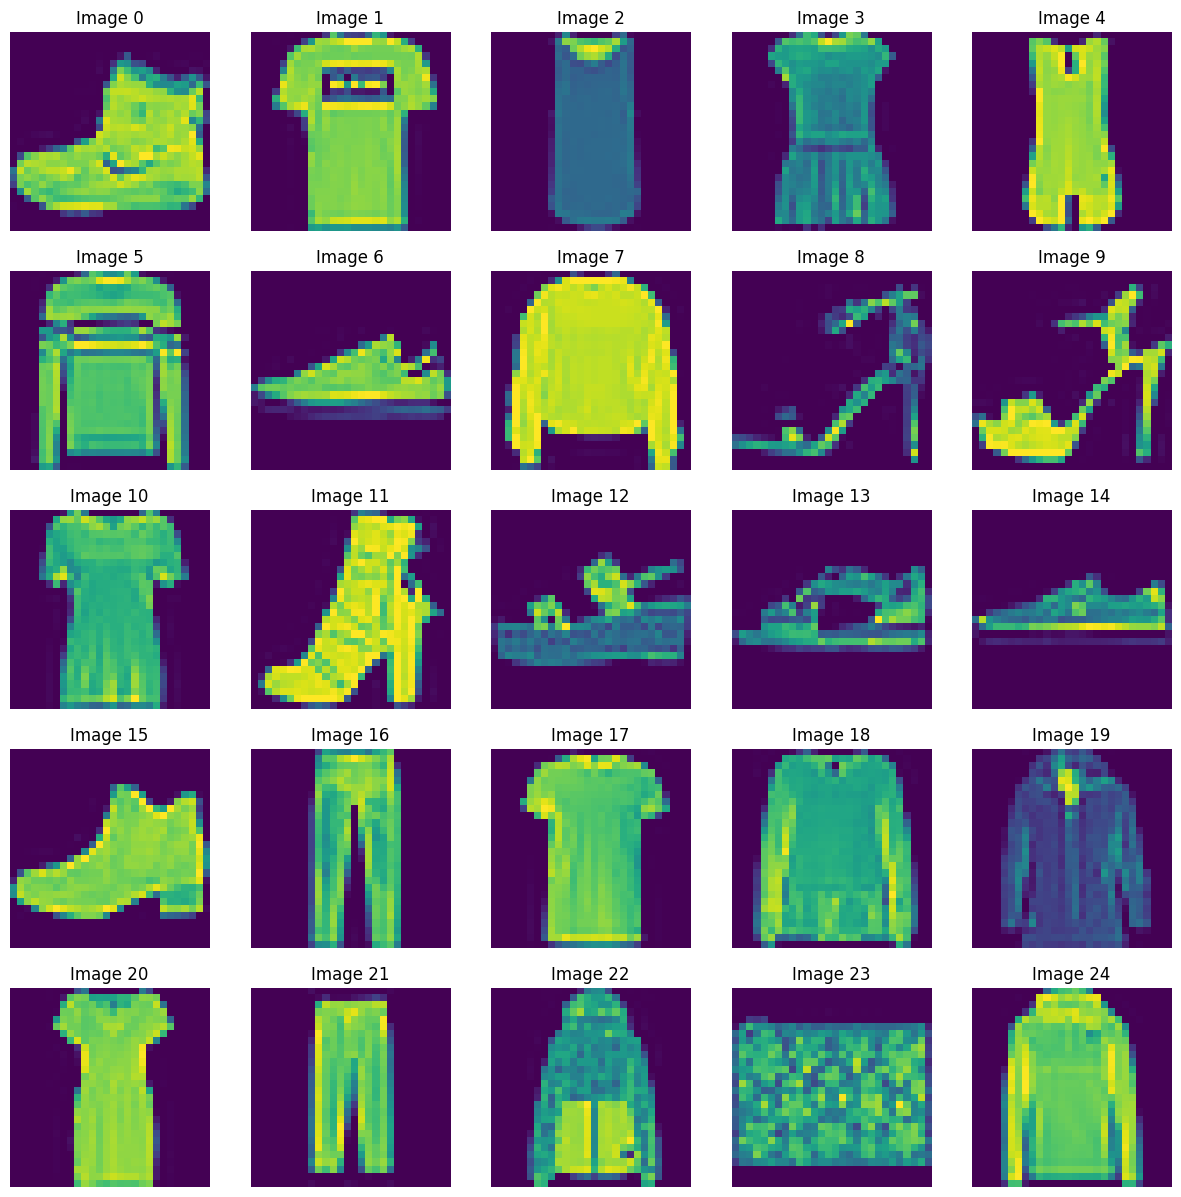

In [8]:
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(train_data[i]) 
    plt.title("Image %s" % i)
    plt.axis('off')

plt.show()

# Count Train_Label

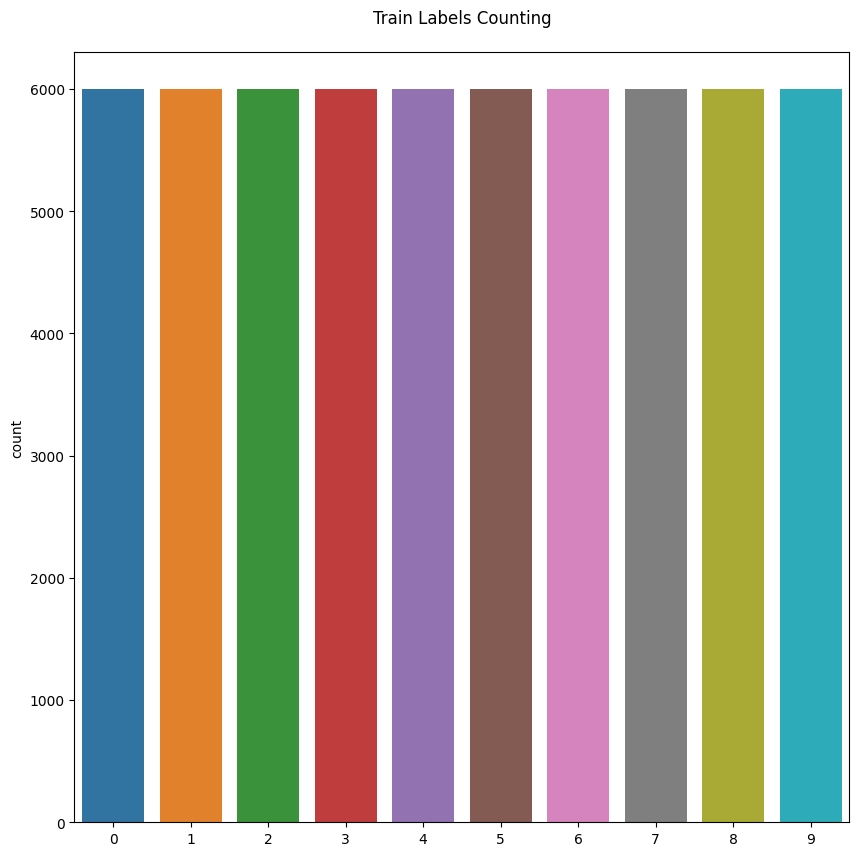

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x=train_label)
plt.title("Train Labels Counting\n")
plt.show()

# Visualize Data From Test Images

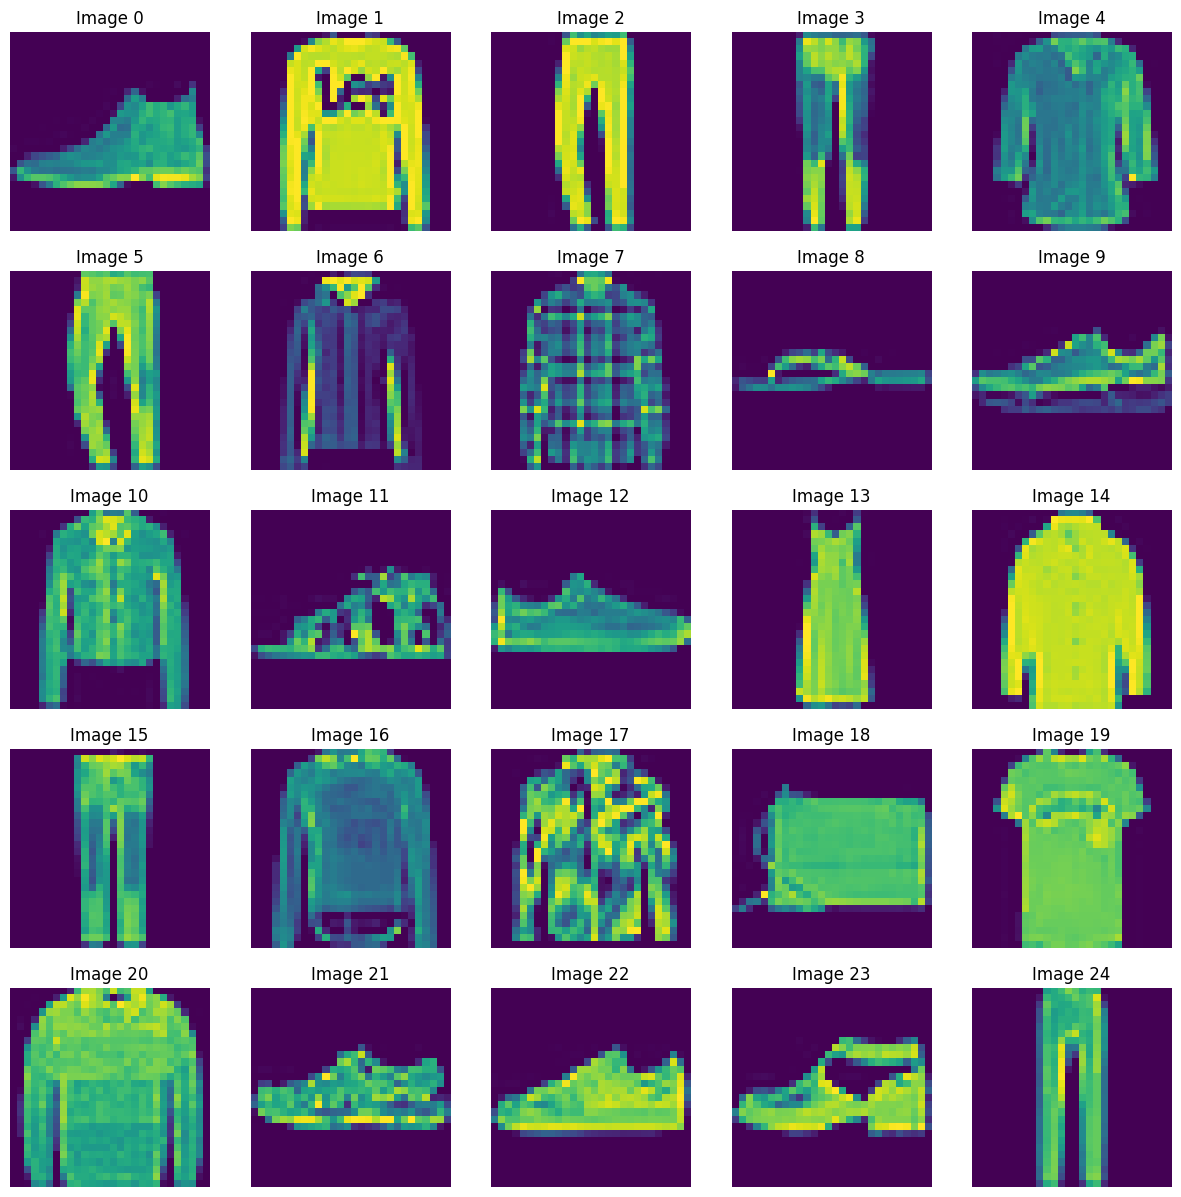

In [10]:
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(test_data[i]) 
    plt.title("Image %s" % i)
    plt.axis('off')

plt.show()

# Count Test Label

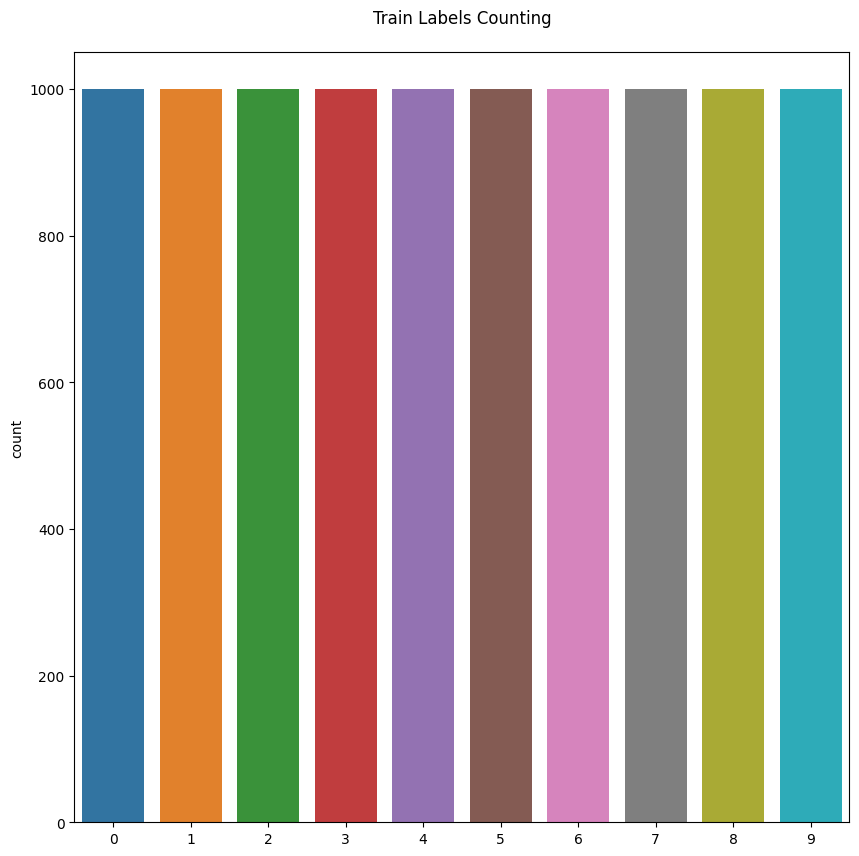

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x=test_label)
plt.title("Train Labels Counting\n")
plt.show()

# Preprocess The Data
## The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

In [12]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
train_data[0].max()

255

In [14]:
train_data[0].min()

0

In [15]:
train_data= train_data/ 255.0

test_data = test_data/ 255.0

## To verify that the data is in the correct format and that you're ready to build and train the network
## let's display the first 25 images from the training set and display the class name below each image

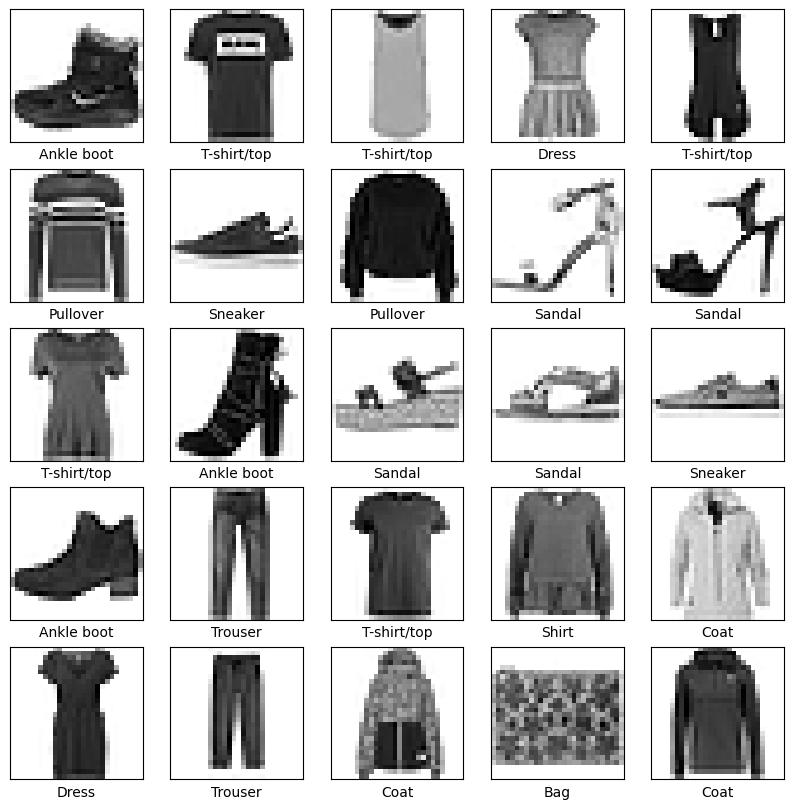

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(label_name[train_label[i]])
plt.show()

# Create NeuralNetwork

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=model.fit(train_data, train_label,validation_data=(test_data,test_label),epochs=10)

Epoch 1/10


I0000 00:00:1724702401.378289     105 service.cc:145] XLA service 0x7f85d4003ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724702401.378340     105 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 114/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6007 - loss: 1.1772

I0000 00:00:1724702402.219921     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7845 - loss: 0.6209 - val_accuracy: 0.8462 - val_loss: 0.4372
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8608 - loss: 0.3834 - val_accuracy: 0.8644 - val_loss: 0.3843
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8762 - loss: 0.3363 - val_accuracy: 0.8483 - val_loss: 0.4209
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8846 - loss: 0.3153 - val_accuracy: 0.8650 - val_loss: 0.3717
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8915 - loss: 0.2933 - val_accuracy: 0.8703 - val_loss: 0.3593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8976 - loss: 0.2775 - val_accuracy: 0.8817 - val_loss: 0.3341
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9023 - loss: 0.2643 - val_accuracy: 0.8818 - val_loss: 0.3336
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9024 - loss: 0.2584 - val_accurac

In [20]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],"b*--",label="accuracy")
    plt.plot(history.history["val_accuracy"],"r*--",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["loss"],"b.--",label="loss")
    plt.plot(history.history["val_loss"],"r.--",label="val_loss")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()



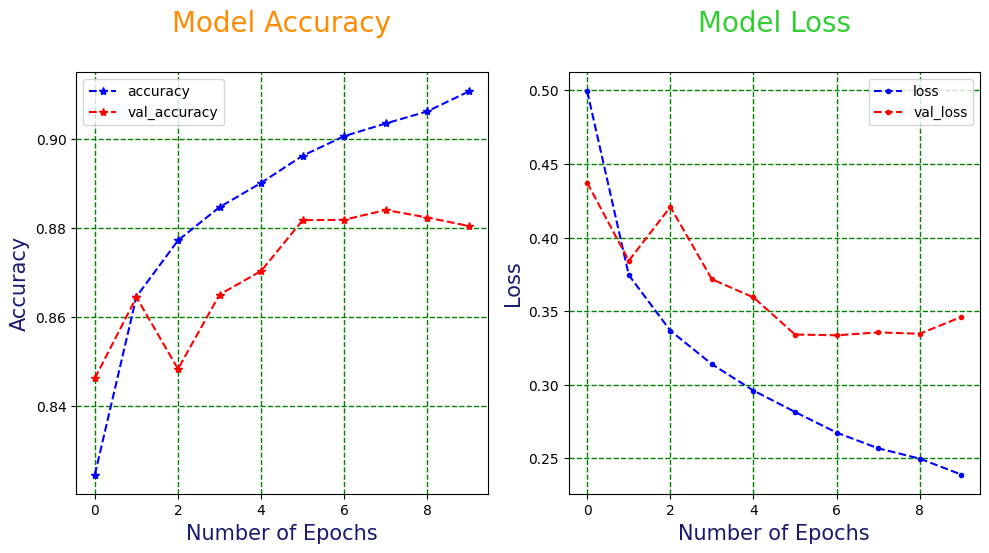

In [21]:
 model_loss_and_accuracy(history)

# Evaluate Accuracy

In [22]:
loss,accuracy=model.evaluate(test_data,  test_label, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.3460


In [23]:
print(f" Model Accuracy is {accuracy}")

 Model Accuracy is 0.8804000020027161


In [24]:
print(f" Model Loss is {loss}")

 Model Loss is 0.34599727392196655


# Make Prediction
 > ## With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [25]:
model_proba= tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [26]:
prediction=model_proba.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
def plot_image(image,predict_array,true_label,my_image):
    true_label,my_image=true_label[i],my_image[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(my_image,cmap=plt.cm.binary)
    predict_label=np.argmax(predict_array)
    if predict_label==true_label:
        color="blue"
    else:
        color="red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(label_name[predict_label],100*np.max(predict_array),
                                         label_name[true_label]),
                                         color=color)
                                
                                
                                

In [28]:
def value_array(image,predict_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plot_bar=plt.bar(range(10),predict_array,color="#777777")
    plt.ylim([0,1])
    predict_label=np.argmax(predict_array)
    plot_bar[predict_label].set_color("red")
    plot_bar[true_label].set_color('blue')

# Verify Model Predictions
> ### With the model trained, you can use it to make predictions about some images.Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.



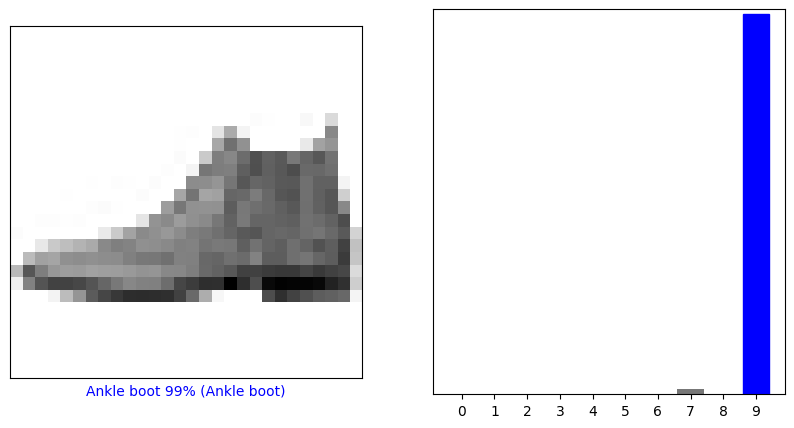

In [29]:
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_data)
plt.subplot(1,2,2)
value_array(i, prediction[i],  test_label)
plt.show()

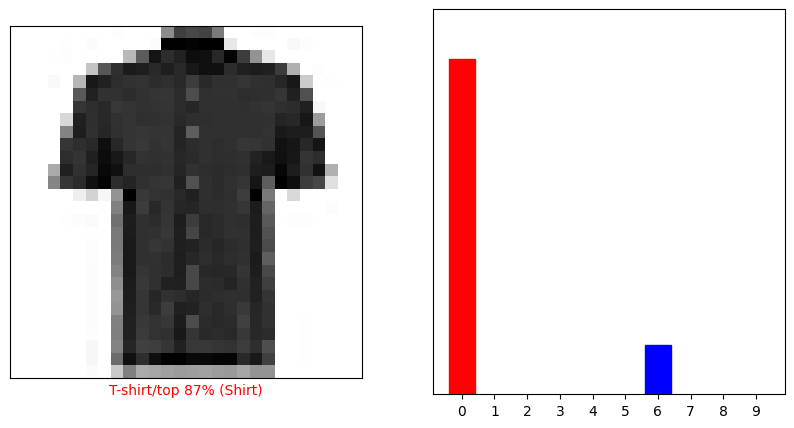

In [30]:
i = 40
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_data)
plt.subplot(1,2,2)
value_array(i, prediction[i],  test_label)
plt.show()

# Let's plot several images with their predictions

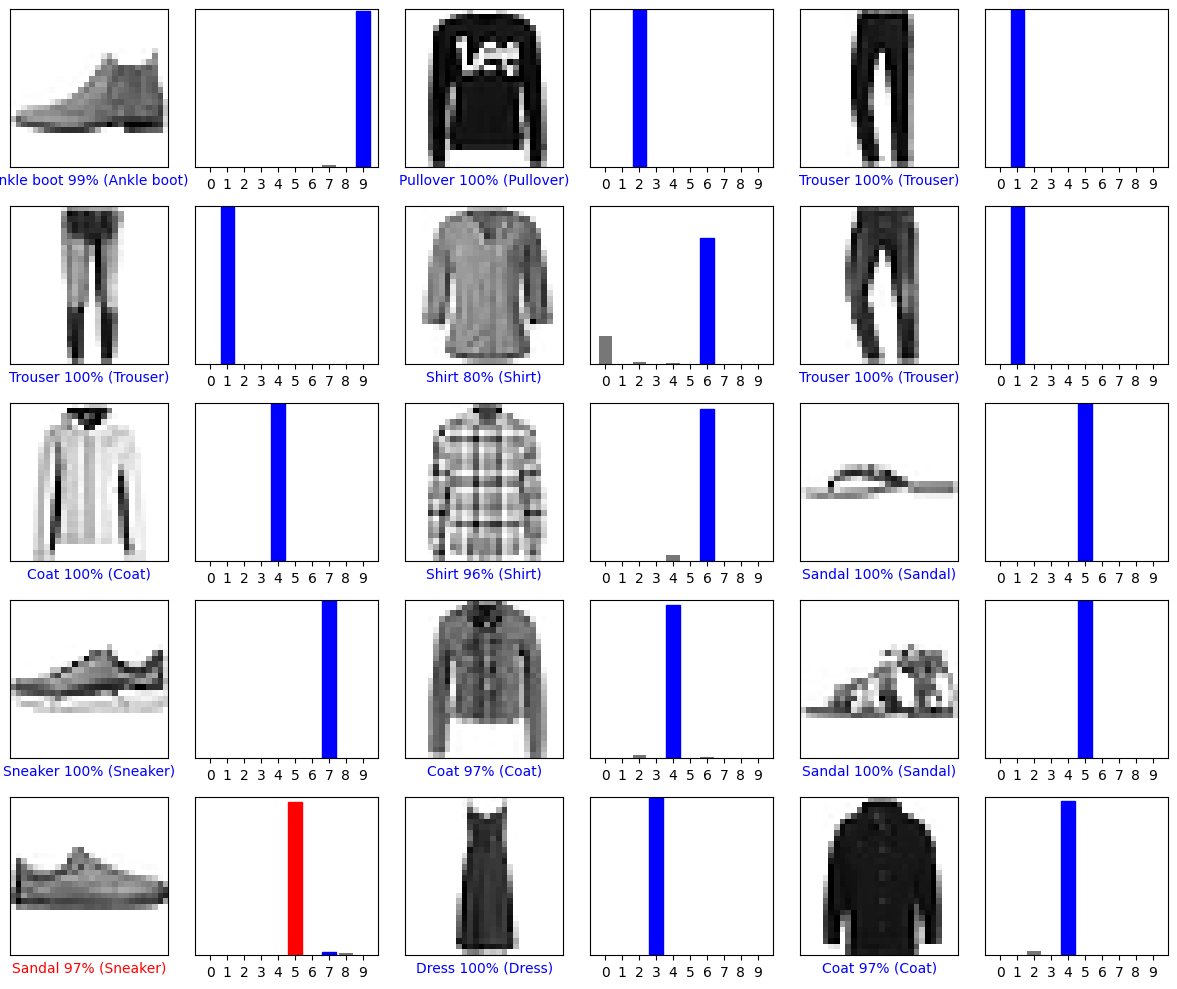

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_label, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  value_array(i, prediction[i], test_label)
    

plt.tight_layout()
plt.show()

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


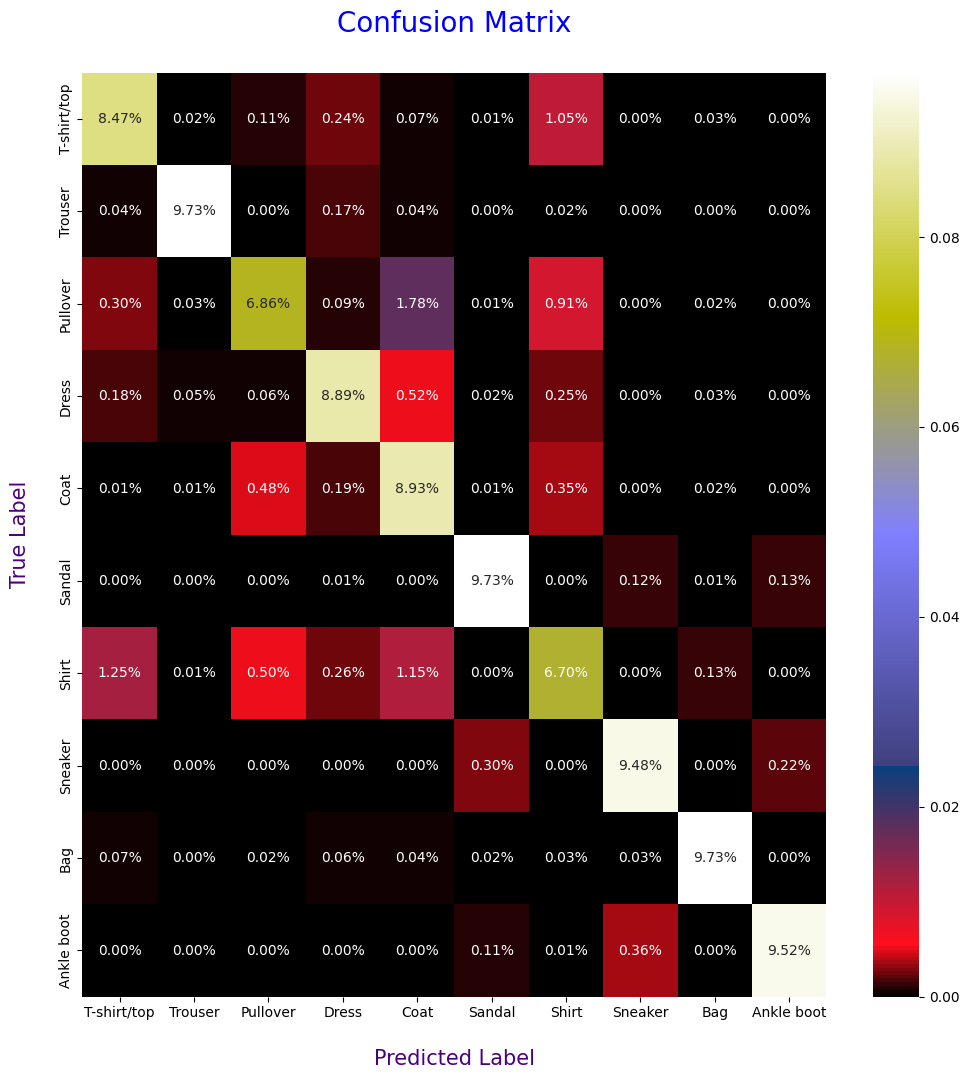

In [32]:
pred=model.predict(test_data)
final_predict=np.argmax(pred,axis=1)
plt.figure(figsize=(12,12))
cf_matrix=confusion_matrix(test_label,final_predict)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='gist_stern',xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",fontsize=20,color="blue")
plt.xlabel("\nPredicted Label",color="indigo",fontsize=15)
plt.ylabel("True Label\n",color="indigo",fontsize=15)
plt.show()

# Classification Report

In [33]:
print(classification_report(test_label,final_predict,target_names=label_name))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.69      0.76      1000
       Dress       0.90      0.89      0.89      1000
        Coat       0.71      0.89      0.79      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.72      0.67      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Custom Data Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


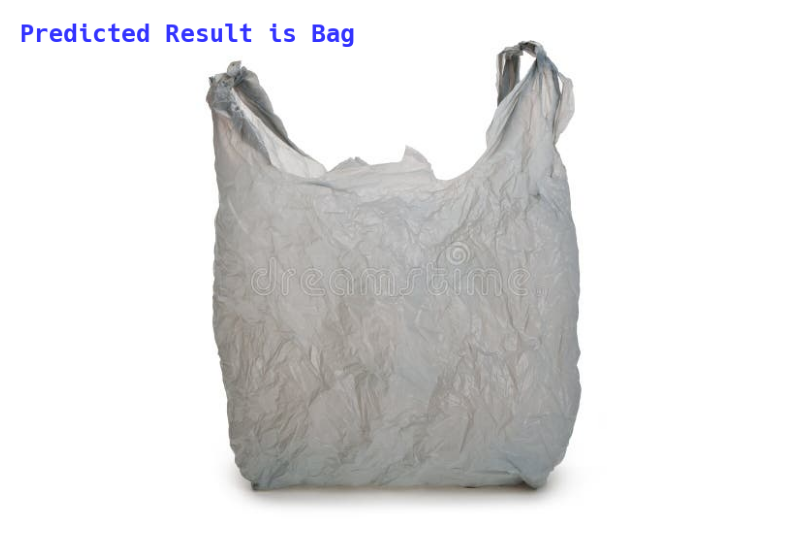

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO

plt.figure(figsize=(10,10))

results = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
image_size = (28, 28)
myFont = ImageFont.truetype('/kaggle/input/elegant-and-functional-fonts/Hack-Bold.ttf', 25)

# Load and preprocess the image
response = requests.get("https://thumbs.dreamstime.com/b/gray-plastic-bag-15281558.jpg")
image_path = Image.open(BytesIO(response.content))
image_resize = image_path.convert("L").resize(image_size)  # Convert to grayscale and resize
image_array = np.array(image_resize)
image_scale = image_array / 255.0
image_reshape = image_scale.reshape(1, 28, 28)  # Adjust shape to match model input

# Predict with the model
final_pred = model.predict(image_reshape)[0]
max_prob = np.argmax(final_pred, axis=0)
my_predict = results[max_prob]

# Draw the prediction on the image
image_draw = ImageDraw.Draw(image_path)
image_draw.text((10, 10), f"Predicted Result is {my_predict}", font=myFont, fill=(51, 51, 255))

# Save and display the image
image_path.save("my_image.png")
my_image = Image.open("my_image.png")
plt.imshow(my_image)
plt.axis('off')  # Hide axes
plt.show()
